In [ ]:
!pip install mysql-connector-python requests pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
%tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import mysql.connector
from mysql.connector import Error
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# MySQL 데이터베이스 연결 설정 함수
def create_db_connection(host_name, db_port, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            port=db_port,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

# 쿼리 실행 함수
def execute_query(connection, query, data=None, commit=False):
    cursor = connection.cursor()
    try:
        if data:
            cursor.execute(query, data)
        else:
            cursor.execute(query)
        if commit:
            connection.commit()
    except Error as e:
        print(f"The error '{e}' occurred")

# 쿼리를 읽는 함수
def execute_read_query(connection, query):
    cursor = connection.cursor(dictionary=True)
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# API에서 데이터를 가져옵니다.
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])

# 데이터베이스에 연결합니다 (자신의 정보를 입력하세요).
connection = create_db_connection("svc.sel5.cloudtype.app", "31979", "root", "kim0523", "cryptocurrency")

# 데이터를 데이터베이스에 저장합니다.
for index, row in hist.iterrows():
    data = (
        pd.to_datetime(row['time'], unit='s'),
        row['high'],
        row['low'],
        row['open'],
        row['close'],
        row['volumefrom'],
        row['volumeto']
    )
    query = """
    INSERT INTO btc_price_history (time, high, low, open, close, volumefrom, volumeto)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
    ON DUPLICATE KEY UPDATE
    high=VALUES(high), low=VALUES(low), open=VALUES(open), close=VALUES(close), volumefrom=VALUES(volumefrom), volumeto=VALUES(volumeto);
    """
    execute_query(connection, query, data, commit=True)

# 데이터베이스에서 같은 데이터를 다시 가져옵니다.
btc_price_history = execute_read_query(connection, "SELECT * FROM btc_price_history")

btc_price_history_df = pd.DataFrame(btc_price_history)
btc_price_history_df.set_index('time', inplace=True)
btc_price_history_df.head()

MySQL Database connection successful


,high,low,open,close,volumefrom,volumeto
time,,,,,,
2022-06-26,28133.44,27065.60,27707.18,27105.67,35.97,990045.41
2022-06-27,27684.54,26504.68,27105.67,26661.61,50.43,1362244.50
2022-06-28,27142.71,26002.14,26661.61,26083.10,80.52,2145490.23
2022-06-29,26284.67,25544.27,26083.10,25892.86,59.01,1527223.29
2022-06-30,25967.07,24021.79,25892.86,25642.36,114.87,2840868.63


from matplotlib import pyplot as plt
_df_0['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['low'].plot(kind='hist', bins=20, title='low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='low', y='open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='open', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='close', y='volumefrom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['high'].plot(kind='line', figsize=(8, 4), title='high')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['low'].plot(kind='line', figsize=(8, 4), title='low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['open'].plot(kind='line', figsize=(8, 4), title='open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=KRW&limit=1000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist.tail(5)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2023-11-03,47517003.96,46214916.45,47512086.49,7902.55,3.681788e+11,46670016.07
2023-11-04,47209833.05,46488725.81,46670016.07,5369.17,2.511953e+11,47045072.36
2023-11-05,47488728.71,46659333.17,47045072.36,5835.35,2.750056e+11,47047012.74
2023-11-06,47189614.65,46457055.33,47047012.74,6273.02,2.936831e+11,46783675.09
2023-11-07,46885256.32,46611461.18,46783675.09,2042.86,9.543374e+10,46721690.53


In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [KRW]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

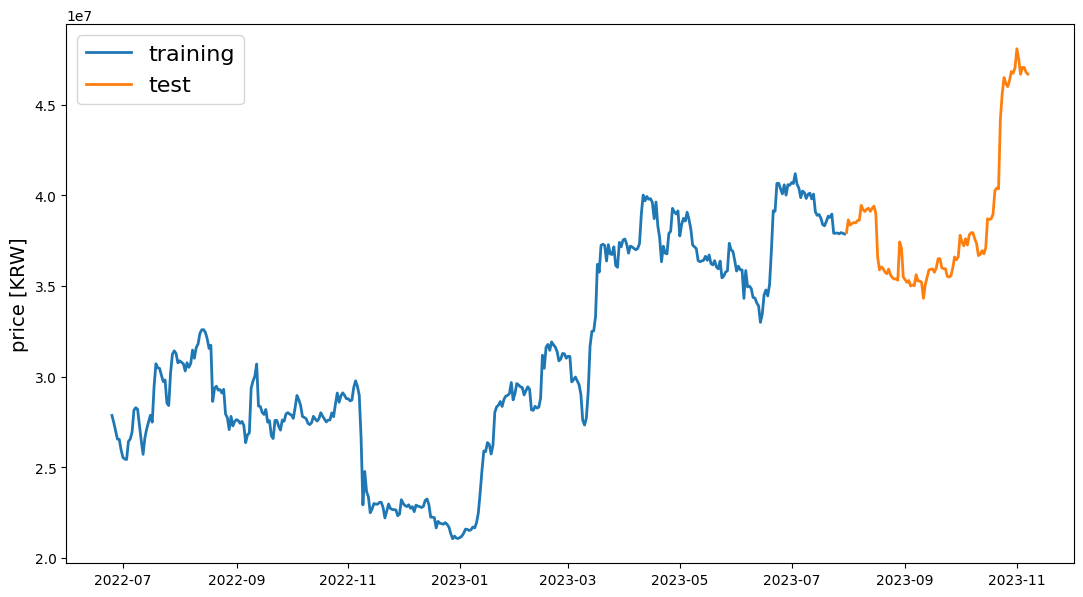

In [ ]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [ ]:
def extract_window_data(df, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
13/13 [==============================] - 3s 50ms/step - loss: 0.0068 - val_loss: 0.0035
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 8.6927e-04
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 6.8856e-04
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0015 - val_loss: 6.2055e-04
Epoch 6/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 5.5821e-04
Epoch 7/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0019 - val_loss: 6.3958e-04
Epoch 8/20
13/13 [==============================] - 0s 31ms/step - loss: 0.0013 - val_loss: 4.7923e-04
Epoch 9/20
13/13 [==============================] - 0s 25ms/step - loss: 0.0013 - val_loss: 5.2412e-04
Epoch 10/20
13/13 [==============================] - 0s 24ms/step - loss: 0.0013 

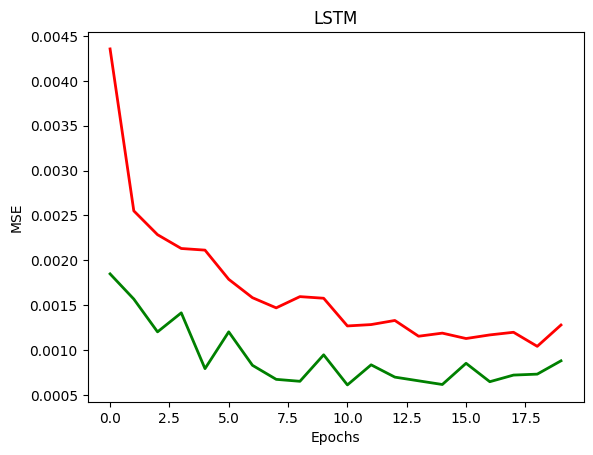

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

3/3 [==============================] - 1s 11ms/step


0.020416528761967152

In [ ]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE

0.0008796935546130551

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.6633355801933403

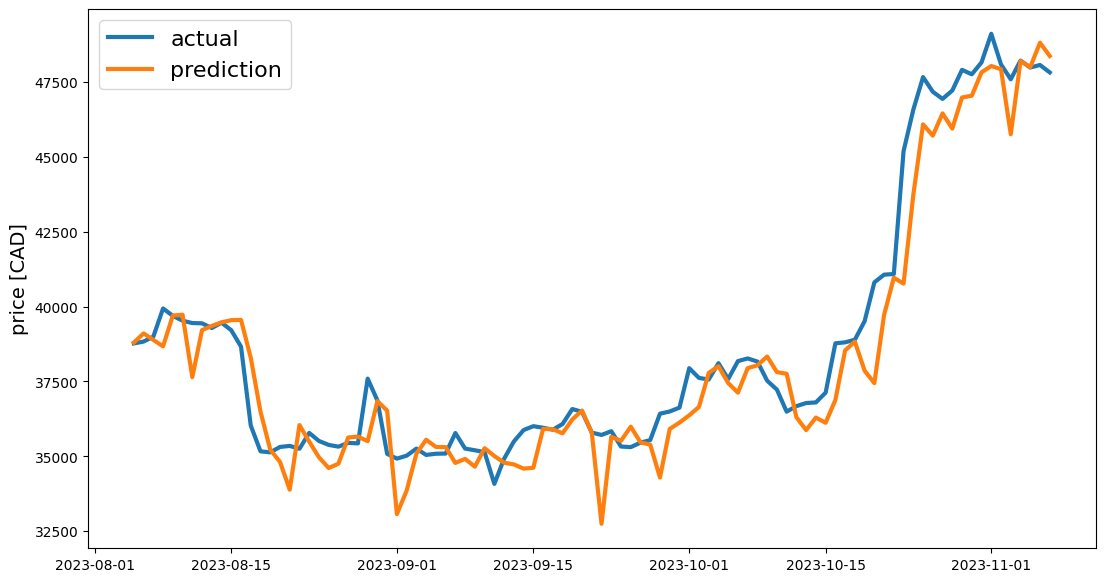

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [ ]:
# 예측한 값과 실제 값을 복원하기 위한 계산
actual_prices = test[target_col].values[window_len:]
predicted_prices = test[target_col].values[:-window_len] * (preds + 1)

# 데이터프레임 생성
comparison_df = pd.DataFrame({'Actual Price': actual_prices, 'Predicted Price': predicted_prices}, index=targets.index)

# 데이터프레임 출력
print(comparison_df)


            Actual Price  Predicted Price
time                                     
2023-08-05   38475778.32     1.471978e+12
2023-08-06   38603674.89     1.511115e+12
2023-08-07   38619401.99     1.491541e+12
2023-08-08   39437823.61     1.486735e+12
2023-08-09   39209315.09     1.528291e+12
...                  ...              ...
2023-11-03   46670016.07     2.142616e+12
2023-11-04   47045072.36     2.252571e+12
2023-11-05   47047012.74     2.257876e+12
2023-11-06   46783675.09     2.347001e+12
2023-11-07   46678949.63     2.298401e+12

[95 rows x 2 columns]
